In [20]:
%reload_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import numpy as np

import subtle.utils.io as suio
import preprocess as preproc
from glob import glob
import subtle.subtle_preprocess as supre
import SimpleITK as sitk
# plt.set_cmap('gray')
# plt.rcParams['figure.figsize'] = (15, 12)

import sigpy.plot as pl
%matplotlib notebook
def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

def show_gad_comparison(img_pre, img_low, img_post, vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 3, 1)
    show_img(img_pre, title='Pre contrast', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 2)
    show_img(img_low, title='10% dosage', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 3)
    show_img(img_post, title='Full dosage', vmin=vmin, vmax=vmax)

    plt.show()

def show_comparison(img1, img2, titles=['', ''], vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 2, 1)
    show_img(img1, title=titles[0], vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 2, 2)
    show_img(img2, title=titles[1], vmin=vmin, vmax=vmax)
    
    plt.show()

def iminfo(img):
    print(img.shape, img.dtype, img.min(), img.max(), img.mean())

class Bunch(object):
    def __init__(self, adict):
        self.__dict__.update(adict)

In [57]:
case_num = 'TwoDim3'
base_path = '/home/srivathsa/projects/studies/gad/tiantan/data/2d/'
args = Bunch({
    'path_base': os.path.join(base_path, case_num), 'override': True, 'verbose': True, 
    'discard_start_percent': 0., 'discard_end_percent': 0., 'normalize_fun': 'mean',
    'path_zero': None, 'path_low': None, 'path_full': None, 'skip_mask': False, 'mask_threshold': 0.1,
    'noise_mask_area': False
})
ims, hdr, metadata = preproc.get_images(args, {'lambda': []})
ims, mask, metadata = preproc.mask_images(args, ims, metadata)
ims_zero, ims_low, ims_full = ims.transpose(1, 0, 2, 3)

path_zero = /home/srivathsa/projects/studies/gad/tiantan/data/2d/TwoDim3/OAx_T1_Pre_5
path_low = /home/srivathsa/projects/studies/gad/tiantan/data/2d/TwoDim3/OAx_T1+C_7
path_full = /home/srivathsa/projects/studies/gad/tiantan/data/2d/TwoDim3/OAx_T1+C_8
file... /home/srivathsa/projects/studies/gad/tiantan/data/2d/TwoDim3/OAx_T1_Pre_5/IM-0003-0001.dcm
file... /home/srivathsa/projects/studies/gad/tiantan/data/2d/TwoDim3/OAx_T1+C_7/IM-0005-0001.dcm
file... /home/srivathsa/projects/studies/gad/tiantan/data/2d/TwoDim3/OAx_T1+C_8/IM-0006-0001.dcm
image sizes:  (23, 512, 512) (23, 512, 512) (23, 512, 512)
masking


In [58]:
spacing = np.array([float(s) for s in metadata['pixel_spacing_zero']][::-1])
ims_zero_iso, _ = supre.zoom_iso(ims_zero, spacing, np.array([1., 0.4688, 0.4688]))
ims_low_iso, _ = supre.zoom_iso(ims_low, spacing, np.array([1., 0.4688, 0.4688]))
print(ims_zero_iso.shape)
print(ims_low_iso.shape)

(126, 512, 512)
(126, 512, 512)


In [67]:
# plt.set_cmap('gray')

spars = sitk.GetDefaultParameterMap('affine')
reg_low = supre.register_im(ims_zero_iso, ims_low_iso, param_map=None, return_params=False, 
                             im_fixed_spacing=[1, 0.4688, 0.4688], im_moving_spacing=[1, 0.4688, 0.4688])

using default 'affine' parameter map
image registration
registration done, 75.9 s


<IPython.core.display.Javascript object>


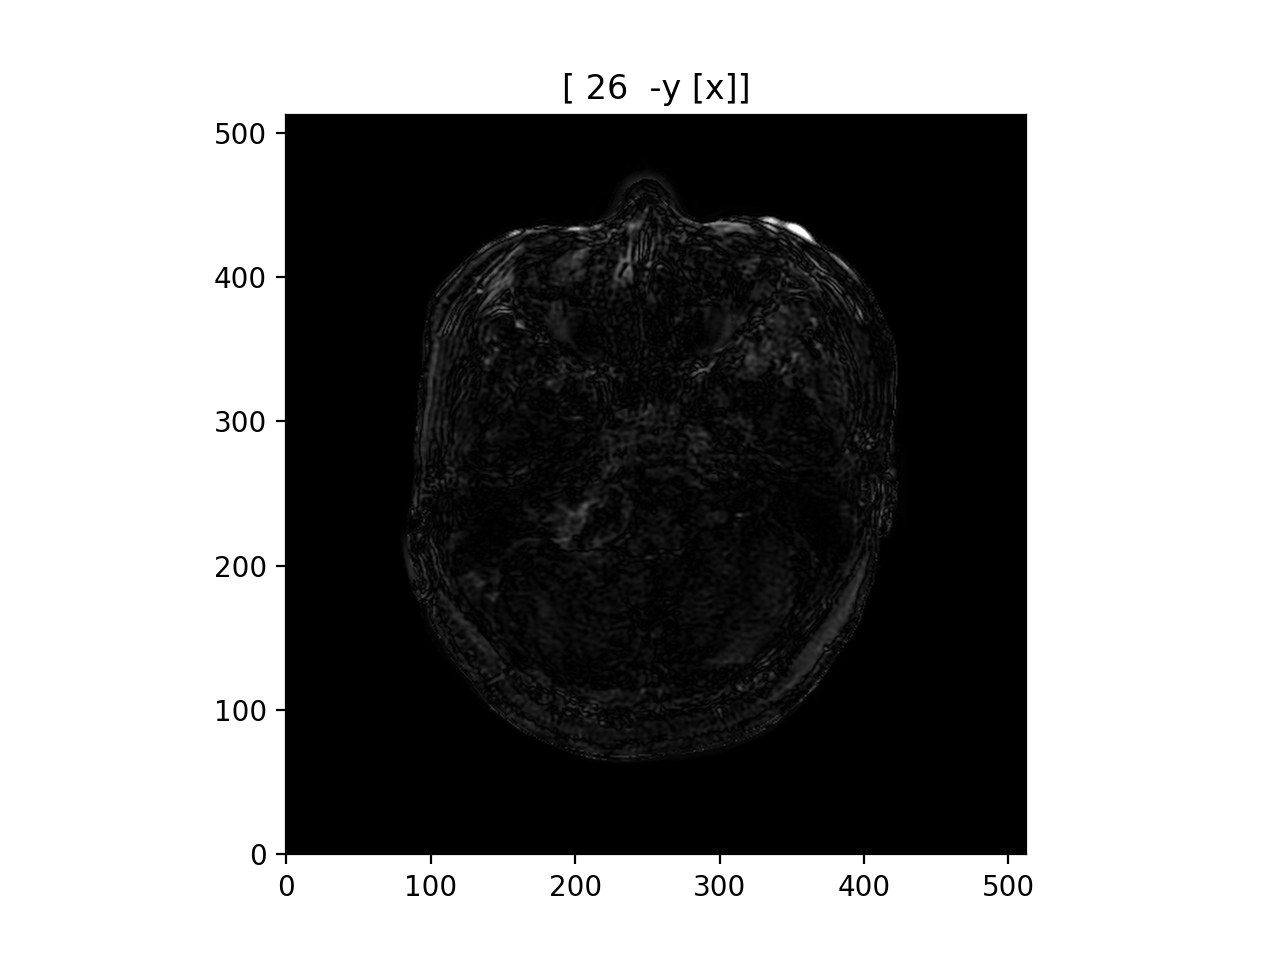

In [69]:
pl.ImagePlot(reg_low - ims_zero_iso)